In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as ohe
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pandas_profiling as pp

C:\Users\Abhishek Badiger\AppData\Local\Temp\ipykernel_17324\2968394354.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
dataset = pd.read_excel('D:/Python programs/crops_prices.xlsx')
dataset.head()

,state_name,district_name,market_center_name,Variety,group_name,date_arrival,Month,Year,Arrival,MODAL,Unnamed: 10
0,Karnataka,Mysore,T. Narasipura,Pachha Bale,Fruits,2019-06-18,6,19,6,2880,NaN
1,Karnataka,Mysore,T. Narasipura,Pachha Bale,Fruits,2019-06-11,6,19,10,29,NaN
2,Karnataka,Mysore,K.R.Nagar,Medium,Fruits,2018-08-29,8,18,2500,13000,NaN
3,Karnataka,Mysore,K.R.Nagar,Medium,Fruits,2018-08-17,8,18,1500,13000,NaN
4,Karnataka,Mysore,K.R.Nagar,Medium,Fruits,2018-07-28,7,18,1500,13300,NaN


In [4]:
for i in dataset:
    print(i,dataset[i].value_counts(),sep="\n",end="\n")

state_name
Karnataka    18436
Name: state_name, dtype: int64
district_name
Mysore       14200
Bangalore     4236
Name: district_name, dtype: int64
market_center_name
Mysore (Bandipalya)    9802
Bangalore              3766
T. Narasipura          1720
Nanjangud              1494
Hunsur                  549
K.R.Nagar               326
Santhesargur            309
Doddaballa Pur          198
Ramanagara              191
Hoskote                  81
Name: market_center_name, dtype: int64
Variety
Tomato                       2662
Carrot                       2218
Beans (Whole)                2215
Brinjal                      1966
Local                        1528
Round                        1520
Fine                         1449
Potato                       1189
Other                        1185
Hybrid/Local                 1174
Hybrid                        731
Onion                         235
Pachha Bale                   197
Elakki Bale                    48
Paddy                          

In [5]:
prof = pp.ProfileReport(dataset)

In [6]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
dataset.describe()

,Month,Year,Arrival,MODAL
count,18436.000000,18436.000000,18436.000000,18436.000000
mean,6.511933,20.222825,44.953515,2097.733619
std,3.430114,1.402440,84.851877,1275.519168
min,1.000000,18.000000,1.000000,12.000000
25%,4.000000,19.000000,4.000000,1125.000000
50%,7.000000,20.000000,14.000000,1900.000000
75%,9.000000,21.000000,40.000000,2900.000000
max,12.000000,23.000000,2500.000000,18000.000000


In [4]:
features = dataset.iloc[:,:-3]
features = features.drop('date_arrival',axis='columns')
targets = dataset.iloc[:,-2]
features.head()

,state_name,district_name,market_center_name,Variety,group_name,Month,Year
0,Karnataka,Mysore,T. Narasipura,Pachha Bale,Fruits,6,19
1,Karnataka,Mysore,T. Narasipura,Pachha Bale,Fruits,6,19
2,Karnataka,Mysore,K.R.Nagar,Medium,Fruits,8,18
3,Karnataka,Mysore,K.R.Nagar,Medium,Fruits,8,18
4,Karnataka,Mysore,K.R.Nagar,Medium,Fruits,7,18


In [5]:
e_stateName = ohe()
features.state_name = e_stateName.fit_transform(features.state_name)
e_distName = ohe()
features.district_name = e_distName.fit_transform(features.district_name)
e_marketName = ohe()
features.market_center_name = e_marketName.fit_transform(features.market_center_name)
e_variety = ohe()
features.Variety = e_variety.fit_transform(features.Variety)
e_grpName = ohe()
features.group_name = e_grpName.fit_transform(features.group_name)

In [6]:
features.head()

,state_name,district_name,market_center_name,Variety,group_name,Month,Year
0,0,1,9,13,1,6,19
1,0,1,9,13,1,6,19
2,0,1,4,10,1,8,18
3,0,1,4,10,1,8,18
4,0,1,4,10,1,7,18


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size = 0.20)

In [8]:
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(X_train,y_train)
result = model.predict(X_test)
result

array([2524.54949656, 5570.16642783, 2480.36397603, ..., 1479.96708256,
       1872.50173661, 2602.24033826])

In [9]:
r2 = r2_score(y_test,result)
mse = mean_squared_error(y_test,result)
print(r2,mse)

0.7832662078153284 366919.6133351205


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

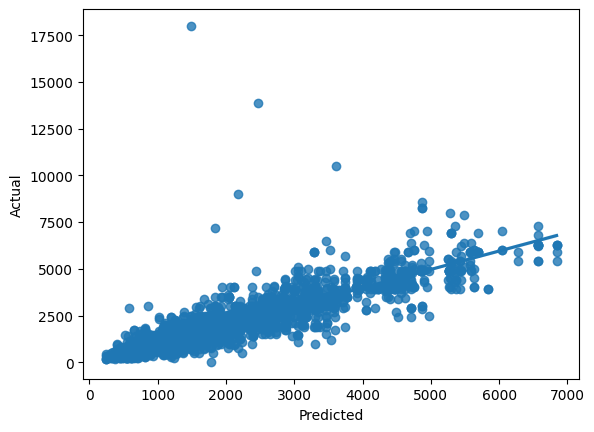

In [10]:
import seaborn as sns
plot = sns.regplot(x=result,y=y_test)
plot.set(xlabel="Predicted",ylabel = "Actual")